<a href="https://colab.research.google.com/github/hsiehby/CIFAR-10-Object-Classification/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

### Load the CIFAR-10 Dataset

In [97]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [98]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [99]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [100]:
(x_val, y_val) = (x_train[40000:], y_train[40000:])
(x_train, y_train) = (x_train[:40000], y_train[:40000])

In [101]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = 10
width, height, channels = x_train[0].shape

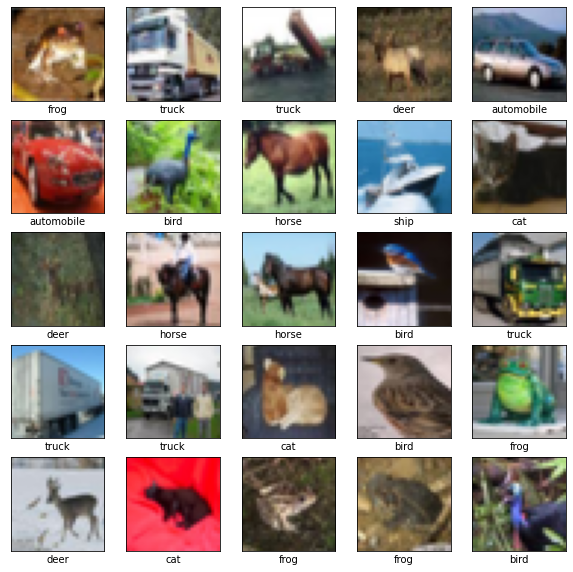

In [103]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [282]:
def plot_loss_history(history):
  plt.figure()
  plt.plot(history.history['loss'], label='training loss')
  plt.plot(history.history['val_loss'], label='validation loss')
  plt.xlabel('No. epoch')
  plt.legend(loc='upper right')
  plt.show()

def plot_acc_history(history):
  plt.figure()
  plt.plot(history.history['accuracy'], label='training accuracy')
  plt.plot(history.history['val_accuracy'], label='validation accuracy')
  plt.xlabel('No. epoch')
  plt.legend(loc='upper right')
  plt.show()

def get_predictions_array(model, test_images, test_labels):
  probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
  predictions = probability_model.predict(test_images)
  return predictions

def plot_prediction(i, predictions_array, labels, images):
  label, image = labels[i], images[i]
  predicted_label = np.argmax(predictions_array)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)

  if label == predicted_label:
    color = 'green'
  else:
    color = 'red'
  
  true_class_name = class_names[label]
  predicted_class_name = class_names[predicted_label]
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_class_name,
                                       100 * np.max(predictions_array),
                                       true_class_name,
                                       color=color))


def plot_prediction_bars(i, predictions_array, labels):
  label = labels[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  plot = plt.bar(range(num_classes), predictions_array, color="#666666")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  plot[predicted_label].set_color('red')
  plot[label].set_color('green')

def plot_predictions(predictions_arrays, test_labels, test_images):
  num_rows = 5
  num_cols = 3
  num_images = num_rows * num_cols
  plt.figure(figsize=(2*2*num_cols, 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_prediction(i, predictions_arrays[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_prediction_bars(i, predictions_arrays[i], test_labels)
  plt.tight_layout()
  plt.show()

def plot_confusion_matrix(true_labels, predicted_labels):
  cm = tf.math.confusion_matrix(true_labels, predicted_labels)
  plt.figure(figsize=(12,9))
  ax = sn.heatmap(cm, cmap='rocket', annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
  ax.set(xlabel='Predicted Label', ylabel='True Label')

### Model 1 - Simple Two Layer Model

In [122]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(width, height, channels)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [123]:
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history1 = model1.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

In [166]:
%cd /content/drive/MyDrive/CIFAR10Models
model1.save('model1')

/content/drive/MyDrive/CIFAR10Models
/content/drive/MyDrive/CIFAR10Models
INFO:tensorflow:Assets written to: model1/assets


313/313 - 0s - loss: 1.5818 - accuracy: 0.4528


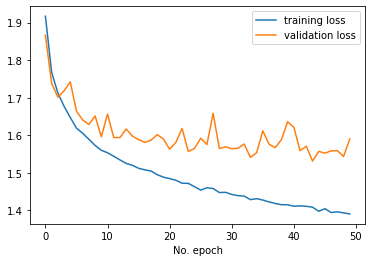

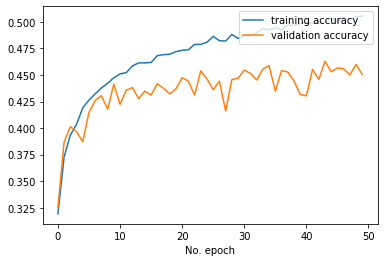

In [167]:
test_loss1, test_acc1 = model1.evaluate(x_test, y_test, verbose=2)
plot_loss_history(history1)
plot_acc_history(history1)

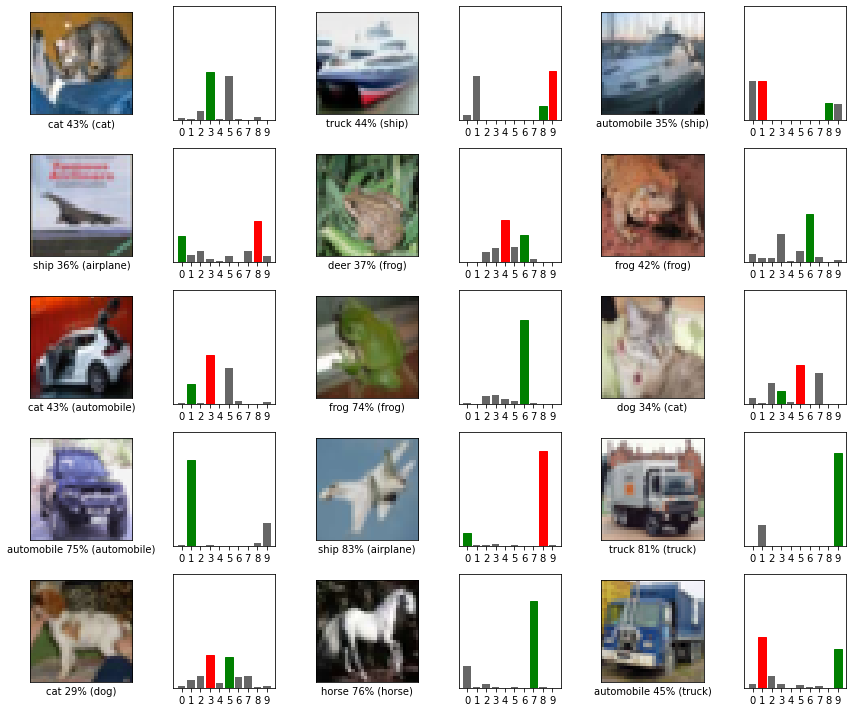

In [203]:
predictions_arrays1 = get_predictions_array(model1, x_test, y_test)
plot_predictions(predictions_arrays1, y_test, x_test)

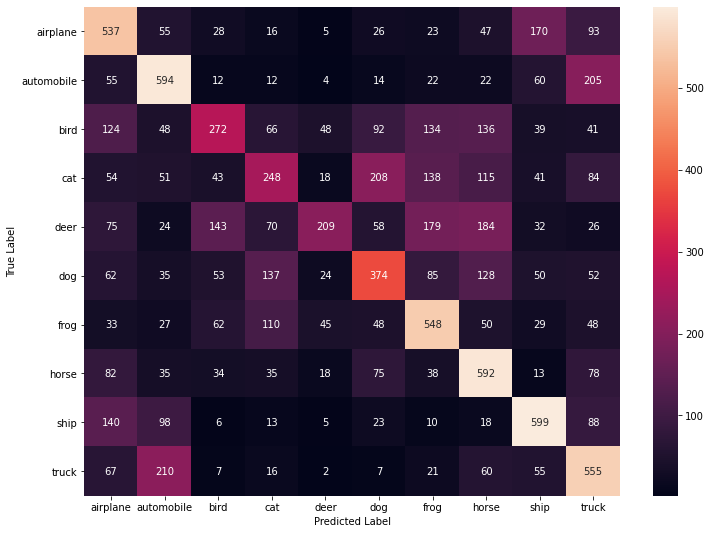

In [283]:
predicted_labels1 = np.argmax(predictions_arrays1, axis=1)
plot_confusion_matrix(y_test, predicted_labels1)

### Model 2 - Baseline CNN

In [192]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [193]:
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

In [201]:
%cd /content/drive/MyDrive/CIFAR10Models
model2.save('model2')

/content/drive/MyDrive/CIFAR10Models
INFO:tensorflow:Assets written to: model2/assets


313/313 - 1s - loss: 2.0642 - accuracy: 0.7112


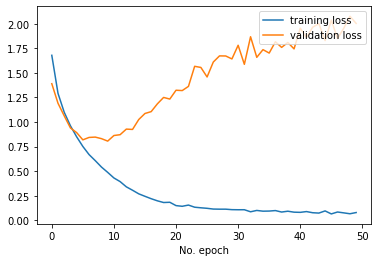

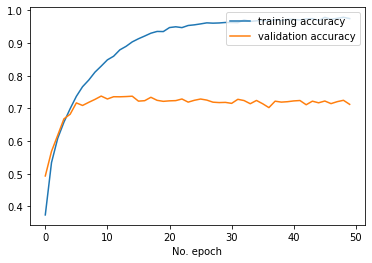

In [202]:
test_loss2, test_acc2 = model2.evaluate(x_test, y_test, verbose=2)
plot_loss_history(history2)
plot_acc_history(history2)

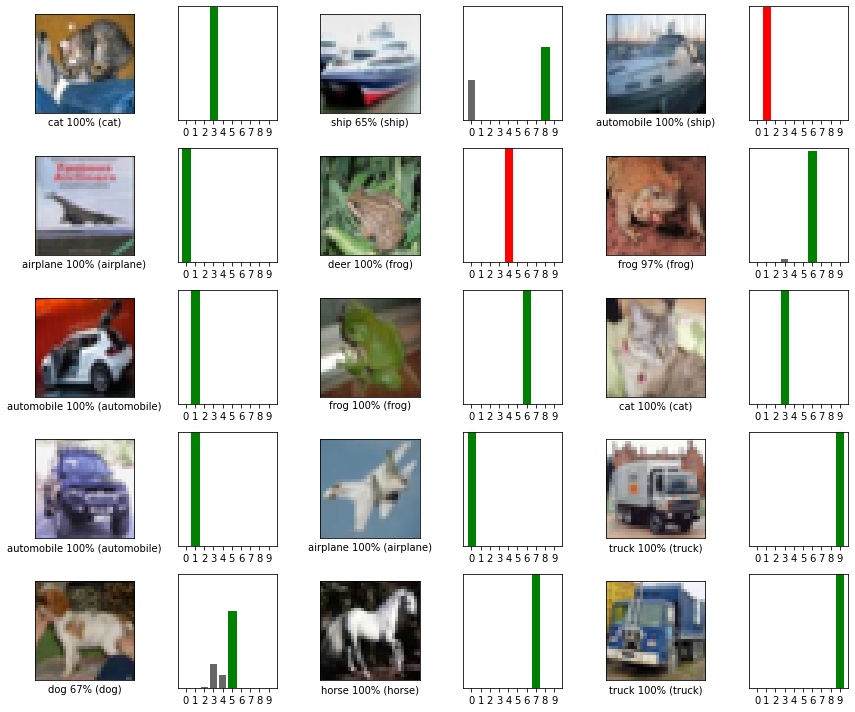

In [204]:
predictions_arrays2 = get_predictions_array(model2, x_test, y_test)
plot_predictions(predictions_arrays2, y_test, x_test)

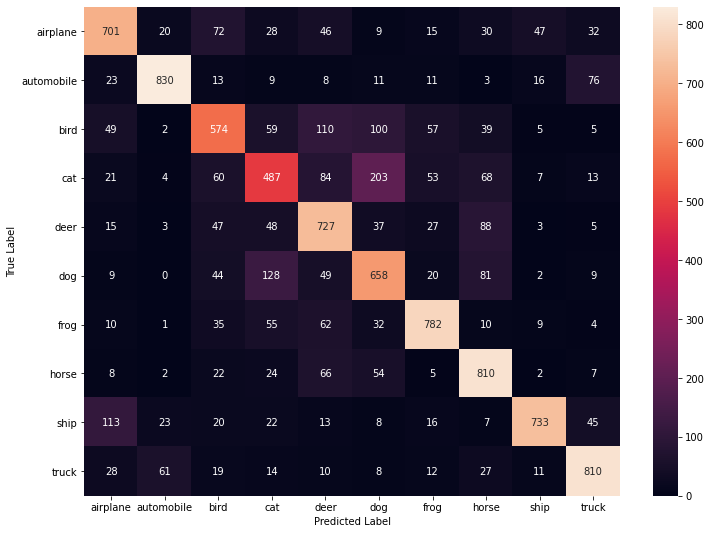

In [284]:
predicted_labels2 = np.argmax(predictions_arrays2, axis=1)
plot_confusion_matrix(y_test, predicted_labels2)

### Model 3 - Baseline + Dropout Layers

In [229]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes)
])

In [230]:
model3.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

In [232]:
%cd /content/drive/MyDrive/CIFAR10Models
model3.save('model3')

/content/drive/MyDrive/CIFAR10Models
INFO:tensorflow:Assets written to: model3/assets


313/313 - 1s - loss: 0.9951 - accuracy: 0.7544


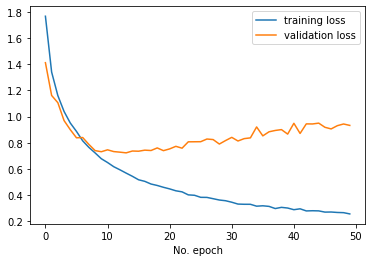

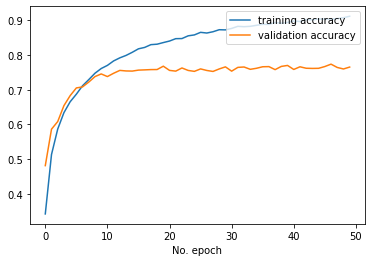

In [233]:
test_loss3, test_acc3 = model3.evaluate(x_test, y_test, verbose=2)
plot_loss_history(history3)
plot_acc_history(history3)

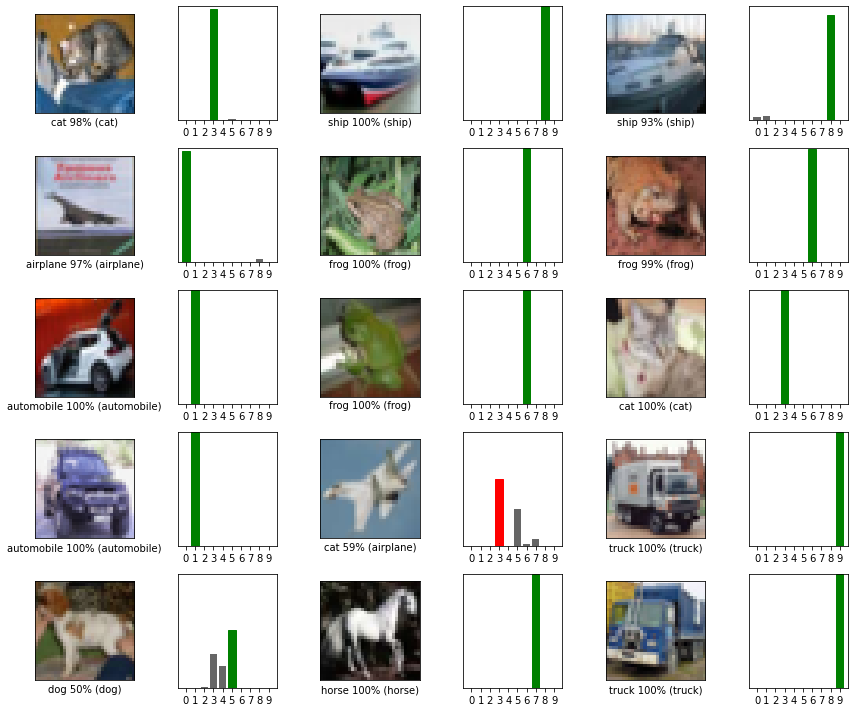

In [234]:
predictions_arrays3 = get_predictions_array(model3, x_test, y_test)
plot_predictions(predictions_arrays3, y_test, x_test)

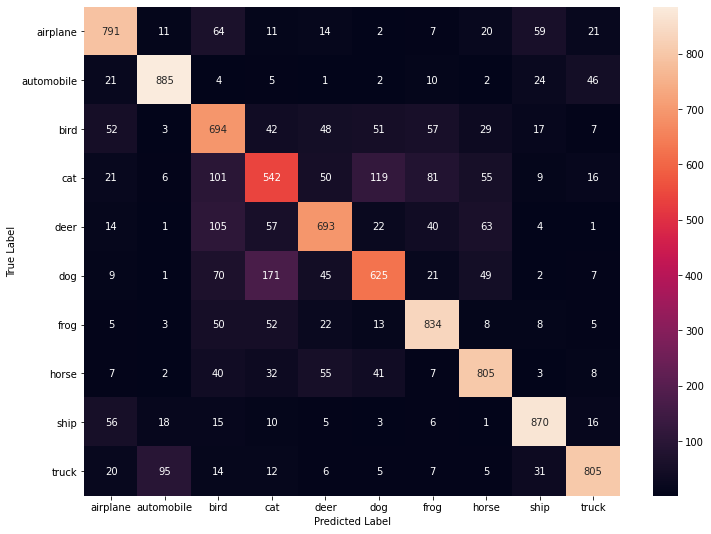

In [285]:
predicted_labels3 = np.argmax(predictions_arrays3, axis=1)
plot_confusion_matrix(y_test, predicted_labels3)

### Model 4 - Basline + L2 Weigt Regularization

In [243]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(width, height, channels)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(num_classes)
])

In [244]:
model4.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [245]:
history4 = model4.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/50
625/625 [==============================] - 4s 6ms/step - loss: 2.1495 - accuracy: 0.2320 - val_loss: 1.7248 - val_accuracy: 0.3970
Epoch 2/50
625/625 [==============================] - 3s 5ms/step - loss: 1.5971 - accuracy: 0.4475 - val_loss: 1.4388 - val_accuracy: 0.5191
Epoch 3/50
625/625 [==============================] - 3s 5ms/step - loss: 1.4091 - accuracy: 0.5306 - val_loss: 1.3641 - val_accuracy: 0.5494
Epoch 4/50
625/625 [==============================] - 3s 5ms/step - loss: 1.3222 - accuracy: 0.5706 - val_loss: 1.2279 - val_accuracy: 0.6100
Epoch 5/50
625/625 [==============================] - 3s 5ms/step - loss: 1.2347 - accuracy: 0.6056 - val_loss: 1.2067 - val_accuracy: 0.6262
Epoch 6/50
625/625 [==============================] - 3s 5ms/step - loss: 1.1887 - accuracy: 0.6301 - val_loss: 1.2101 - val_accuracy: 0.6304
Epoch 7/50
625/625 [==============================] - 3s 5ms/step - loss: 1.1318 - accuracy: 0.6554 - val_loss: 1.1748 - val_accuracy: 0.6452
Epoch 

In [246]:
%cd /content/drive/MyDrive/CIFAR10Models
model4.save('model4')

/content/drive/MyDrive/CIFAR10Models
INFO:tensorflow:Assets written to: model4/assets


313/313 - 1s - loss: 1.1957 - accuracy: 0.7398


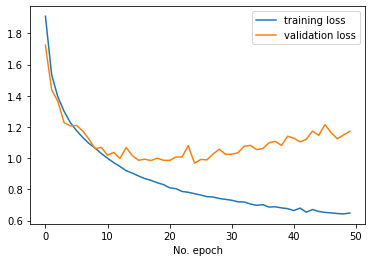

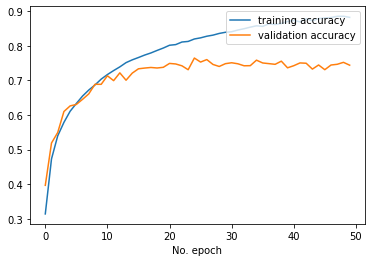

In [247]:
test_loss4, test_acc4 = model4.evaluate(x_test, y_test, verbose=2)
plot_loss_history(history4)
plot_acc_history(history4)

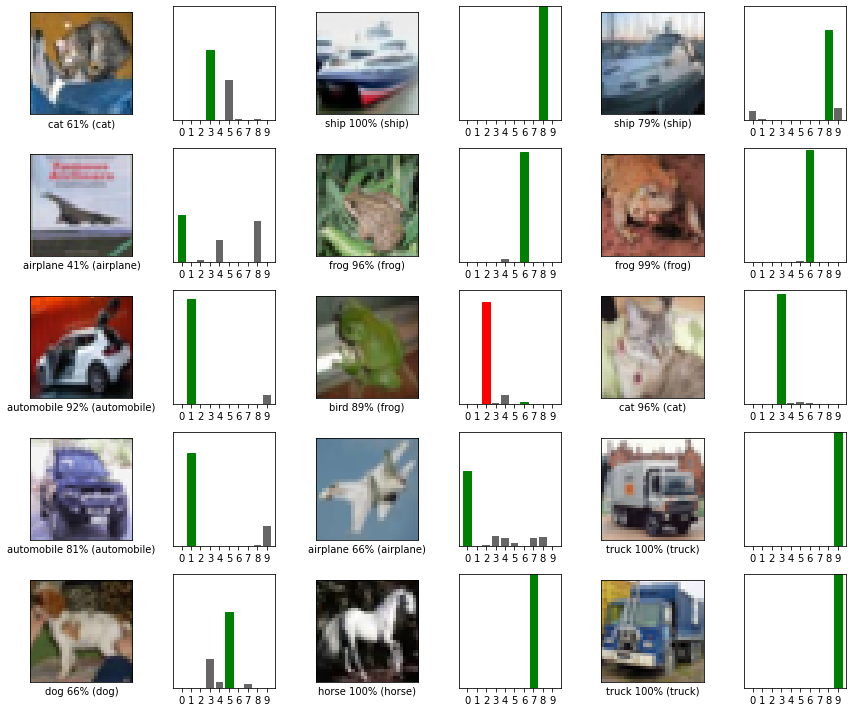

In [248]:
predictions_arrays4 = get_predictions_array(model4, x_test, y_test)
plot_predictions(predictions_arrays4, y_test, x_test)

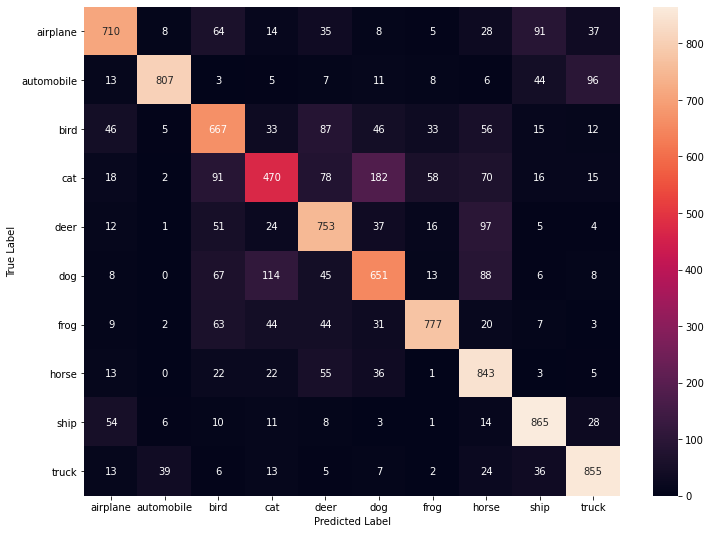

In [286]:
predicted_labels4 = np.argmax(predictions_arrays4, axis=1)
plot_confusion_matrix(y_test, predicted_labels4)

### Model 5 - Baseline + Data Augmentation

In [254]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    rotation_range=20, 
    horizontal_flip=True
)
it_train = datagen.flow(x_train, y_train, batch_size=64)

In [255]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

In [256]:
model5.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [257]:
steps = int(x_train.shape[0] / 64)
history5 = model5.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
625/625 [==============================] - 19s 30ms/step - loss: 1.9751 - accuracy: 0.2472 - val_loss: 1.4618 - val_accuracy: 0.4639
Epoch 2/100
625/625 [==============================] - 19s 30ms/step - loss: 1.4530 - accuracy: 0.4669 - val_loss: 1.3338 - val_accuracy: 0.5301
Epoch 3/100
625/625 [==============================] - 19s 30ms/step - loss: 1.3048 - accuracy: 0.5272 - val_loss: 1.1926 - val_accuracy: 0.5776
Epoch 4/100
625/625 [==============================] - 19s 30ms/step - loss: 1.1879 - accuracy: 0.5741 - val_loss: 1.1495 - val_accuracy: 0.6029
Epoch 5/100
625/625 [==============================] - 19s 30ms/step - loss: 1.1001 - accuracy: 0.6084 - val_loss: 1.0264 - val_accuracy: 0.6433
Epoch 6/100
625/625 [==============================] - 19s 30ms/step - loss: 1.0355 - accuracy: 0.6331 - val_loss: 0.9461 - val_accuracy: 0.6672
Epoch 7/100
625/625 [==============================] - 19s 30ms/step - loss: 0.9805 - accuracy: 0.6531 - val_loss: 1.0581 - val_ac

In [258]:
%cd /content/drive/MyDrive/CIFAR10Models
model5.save('model5')

/content/drive/MyDrive/CIFAR10Models
INFO:tensorflow:Assets written to: model5/assets


313/313 - 1s - loss: 0.6369 - accuracy: 0.8041


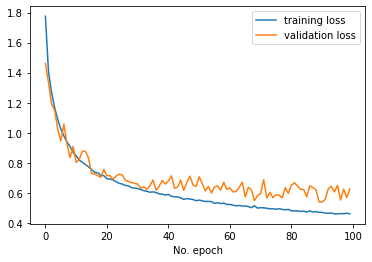

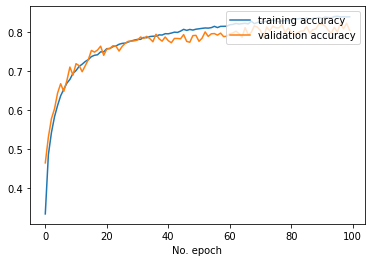

In [259]:
test_loss5, test_acc5 = model5.evaluate(x_test, y_test, verbose=2)
plot_loss_history(history5)
plot_acc_history(history5)

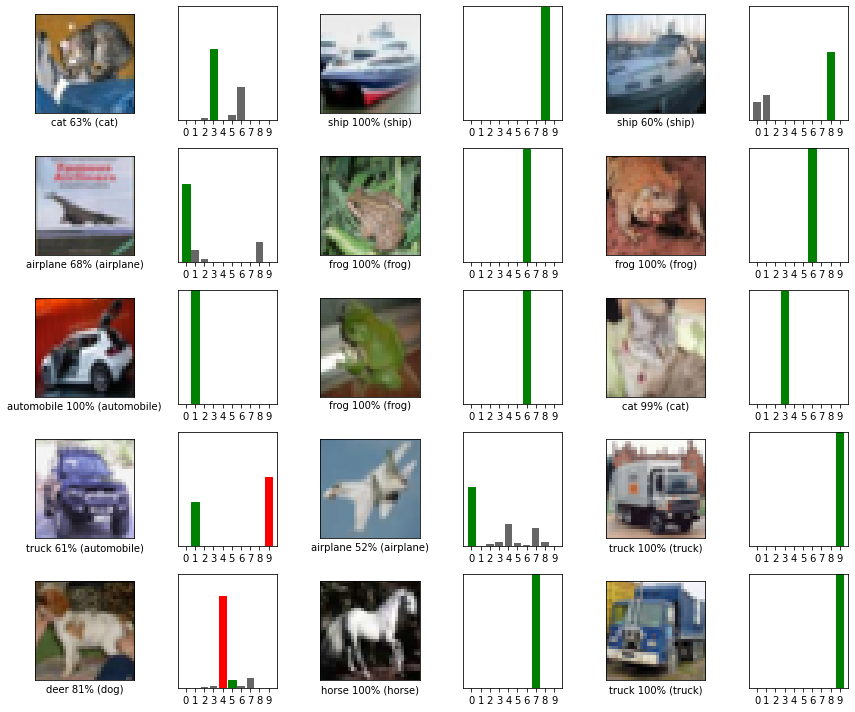

In [261]:
predictions_arrays5 = get_predictions_array(model5, x_test, y_test)
plot_predictions(predictions_arrays5, y_test, x_test)

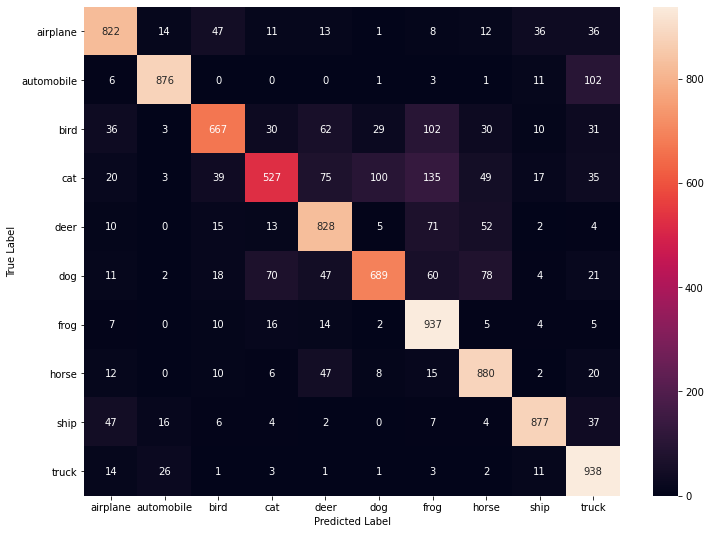

In [287]:
predicted_labels5 = np.argmax(predictions_arrays5, axis=1)
plot_confusion_matrix(y_test, predicted_labels5)

Model 6 - Baseline + Increasing Dropout Rate

In [263]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(num_classes)
])

In [264]:
model6.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [265]:
history6 = model6.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/100
625/625 [==============================] - 4s 6ms/step - loss: 2.0362 - accuracy: 0.2224 - val_loss: 1.5568 - val_accuracy: 0.4052
Epoch 2/100
625/625 [==============================] - 3s 5ms/step - loss: 1.4798 - accuracy: 0.4659 - val_loss: 1.2313 - val_accuracy: 0.5538
Epoch 3/100
625/625 [==============================] - 3s 5ms/step - loss: 1.3038 - accuracy: 0.5351 - val_loss: 1.1018 - val_accuracy: 0.6046
Epoch 4/100
625/625 [==============================] - 3s 5ms/step - loss: 1.1806 - accuracy: 0.5818 - val_loss: 1.0065 - val_accuracy: 0.6428
Epoch 5/100
625/625 [==============================] - 3s 5ms/step - loss: 1.1088 - accuracy: 0.6169 - val_loss: 0.9770 - val_accuracy: 0.6527
Epoch 6/100
625/625 [==============================] - 3s 5ms/step - loss: 1.0338 - accuracy: 0.6413 - val_loss: 0.9555 - val_accuracy: 0.6724
Epoch 7/100
625/625 [==============================] - 3s 5ms/step - loss: 1.0012 - accuracy: 0.6548 - val_loss: 0.8852 - val_accuracy: 0.6902

In [266]:
%cd /content/drive/MyDrive/CIFAR10Models
model6.save('model6')

/content/drive/MyDrive/CIFAR10Models
INFO:tensorflow:Assets written to: model6/assets


313/313 - 1s - loss: 0.8811 - accuracy: 0.7777


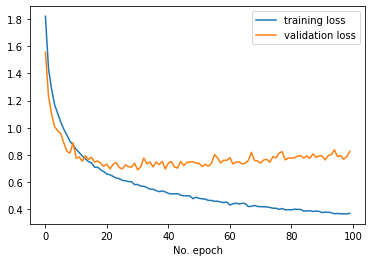

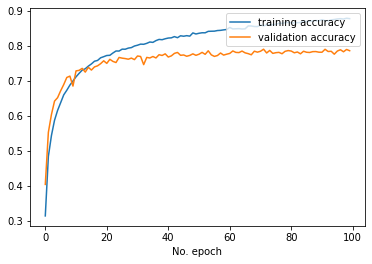

In [267]:
test_loss6, test_acc6 = model6.evaluate(x_test, y_test, verbose=2)
plot_loss_history(history6)
plot_acc_history(history6)

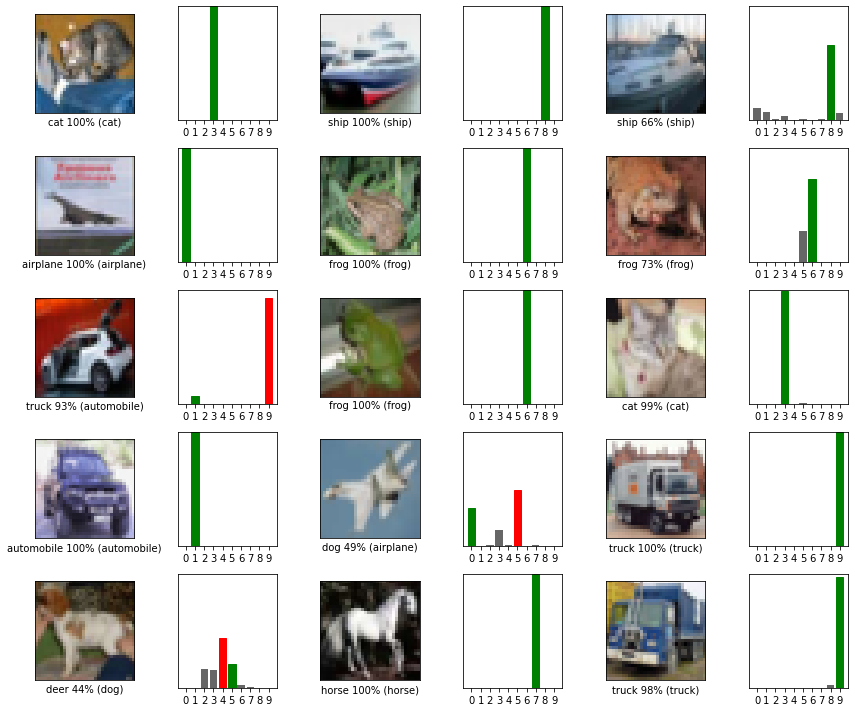

In [268]:
predictions_arrays6 = get_predictions_array(model6, x_test, y_test)
plot_predictions(predictions_arrays6, y_test, x_test)

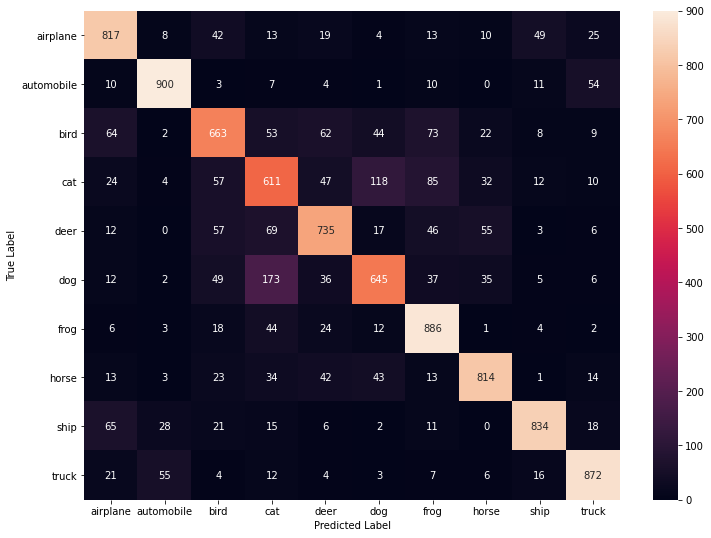

In [288]:
predicted_labels6 = np.argmax(predictions_arrays6, axis=1)
plot_confusion_matrix(y_test, predicted_labels6)

## Putting It Altogether

### Model 7 - Baseline + Increasing Dropout Rate + Data Augmentation

In [270]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(num_classes)
])

In [271]:
model7.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [272]:
steps = int(x_train.shape[0] / 64)
history7 = model7.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
625/625 [==============================] - 19s 30ms/step - loss: 2.1000 - accuracy: 0.2001 - val_loss: 1.4532 - val_accuracy: 0.4678
Epoch 2/100
625/625 [==============================] - 18s 29ms/step - loss: 1.5882 - accuracy: 0.4163 - val_loss: 1.2623 - val_accuracy: 0.5395
Epoch 3/100
625/625 [==============================] - 19s 30ms/step - loss: 1.4519 - accuracy: 0.4830 - val_loss: 1.2300 - val_accuracy: 0.5583
Epoch 4/100
625/625 [==============================] - 18s 29ms/step - loss: 1.3517 - accuracy: 0.5175 - val_loss: 1.1358 - val_accuracy: 0.5871
Epoch 5/100
625/625 [==============================] - 18s 29ms/step - loss: 1.2964 - accuracy: 0.5405 - val_loss: 1.1043 - val_accuracy: 0.5910
Epoch 6/100
625/625 [==============================] - 18s 30ms/step - loss: 1.2455 - accuracy: 0.5620 - val_loss: 1.1106 - val_accuracy: 0.6105
Epoch 7/100
625/625 [==============================] - 18s 29ms/step - loss: 1.2075 - accuracy: 0.5756 - val_loss: 1.0282 - val_ac

In [277]:
%cd /content/drive/MyDrive/CIFAR10Models
model7.save('model7')

/content/drive/MyDrive/CIFAR10Models
INFO:tensorflow:Assets written to: model7/assets


313/313 - 1s - loss: 0.6520 - accuracy: 0.7835


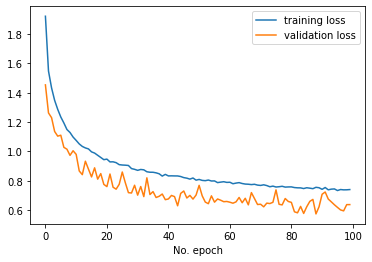

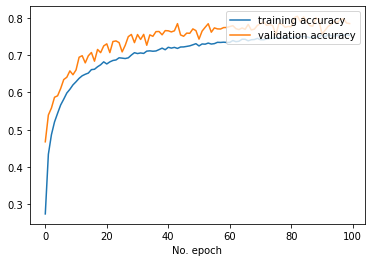

In [278]:
test_loss7, test_acc7 = model7.evaluate(x_test, y_test, verbose=2)
plot_loss_history(history7)
plot_acc_history(history7)

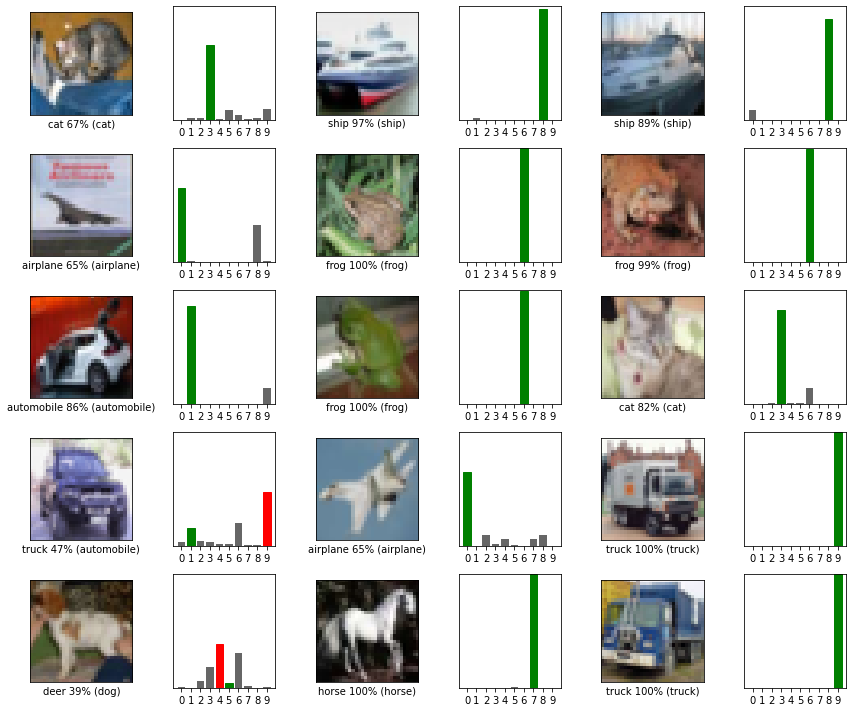

In [275]:
predictions_arrays7 = get_predictions_array(model7, x_test, y_test)
plot_predictions(predictions_arrays7, y_test, x_test)

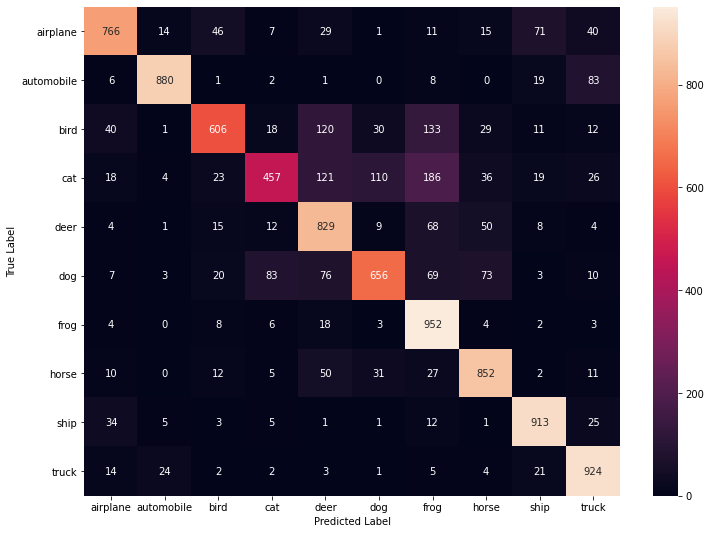

In [289]:
predicted_labels7 = np.argmax(predictions_arrays7, axis=1)
plot_confusion_matrix(y_test, predicted_labels7)

### Model 8 - Baseline + Increasing Dropout + Data Augmentation + Batch Normalization

In [292]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, channels)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(num_classes)
])

In [293]:
model8.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [294]:
steps = int(x_train.shape[0] / 64)
history8 = model8.fit(it_train, steps_per_epoch=steps, epochs=200, validation_data=(x_val, y_val), verbose=1)

Epoch 1/200
625/625 [==============================] - 21s 31ms/step - loss: 2.5097 - accuracy: 0.2512 - val_loss: 1.4931 - val_accuracy: 0.4483
Epoch 2/200
625/625 [==============================] - 19s 31ms/step - loss: 1.5512 - accuracy: 0.4404 - val_loss: 1.3251 - val_accuracy: 0.5190
Epoch 3/200
625/625 [==============================] - 19s 31ms/step - loss: 1.3343 - accuracy: 0.5250 - val_loss: 1.3404 - val_accuracy: 0.5410
Epoch 4/200
625/625 [==============================] - 19s 31ms/step - loss: 1.2242 - accuracy: 0.5702 - val_loss: 1.2222 - val_accuracy: 0.5791
Epoch 5/200
625/625 [==============================] - 19s 31ms/step - loss: 1.1243 - accuracy: 0.6061 - val_loss: 1.0062 - val_accuracy: 0.6544
Epoch 6/200
625/625 [==============================] - 19s 31ms/step - loss: 1.0683 - accuracy: 0.6274 - val_loss: 0.9023 - val_accuracy: 0.6784
Epoch 7/200
625/625 [==============================] - 19s 31ms/step - loss: 1.0291 - accuracy: 0.6446 - val_loss: 0.9898 - val_ac

In [295]:
%cd /content/drive/MyDrive/CIFAR10Models
model8.save('model8')

/content/drive/MyDrive/CIFAR10Models
INFO:tensorflow:Assets written to: model8/assets


313/313 - 1s - loss: 0.4658 - accuracy: 0.8459


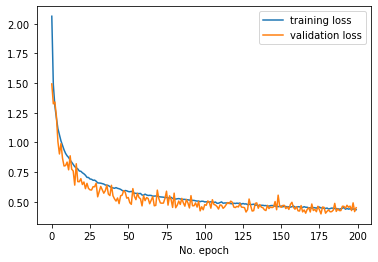

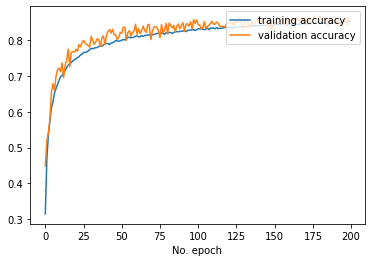

In [302]:
test_loss8, test_acc8 = model8.evaluate(x_test, y_test, verbose=2)
plot_loss_history(history8)
plot_acc_history(history8)

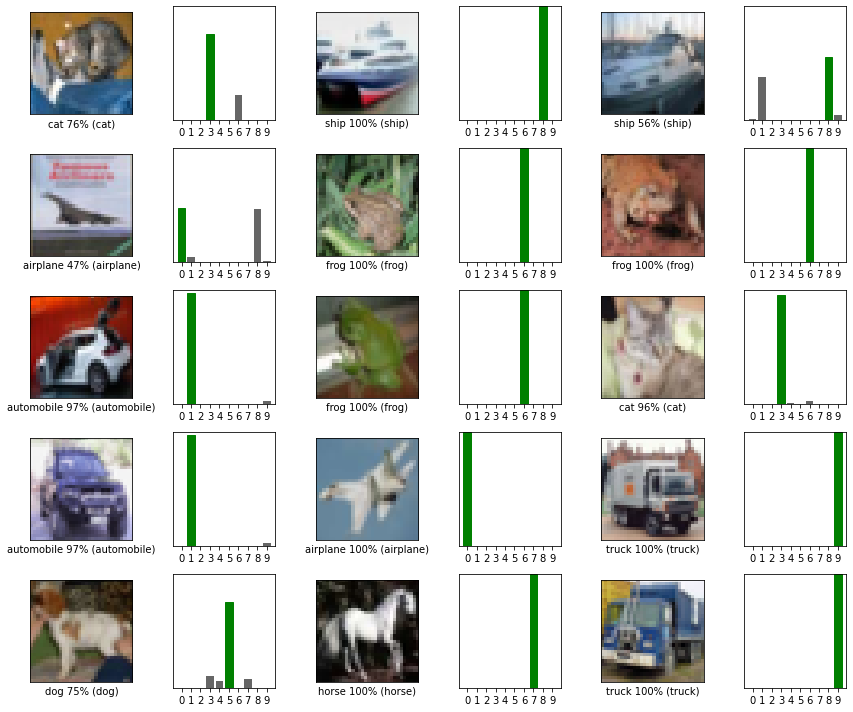

In [297]:
predictions_arrays8 = get_predictions_array(model8, x_test, y_test)
plot_predictions(predictions_arrays8, y_test, x_test)

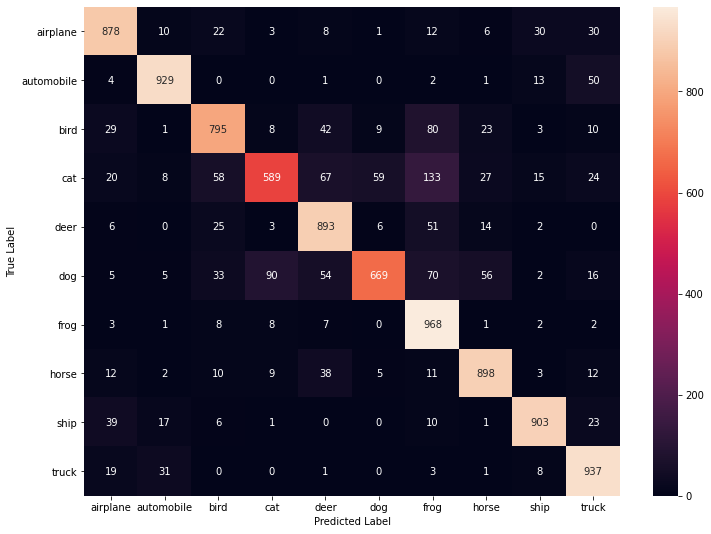

In [298]:
predicted_labels8 = np.argmax(predictions_arrays8, axis=1)
plot_confusion_matrix(y_test, predicted_labels8)

## Comparing Models

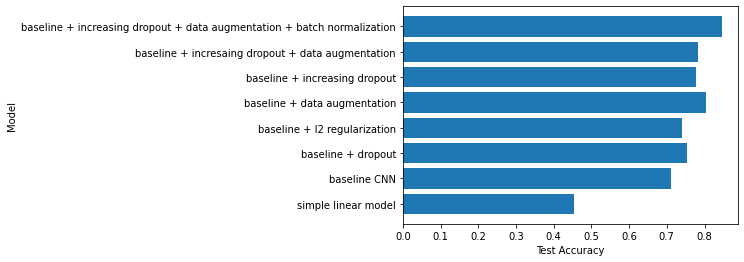

In [303]:
test_accuracies = [test_acc1, test_acc2, test_acc3, test_acc4, test_acc5, test_acc6, test_acc7, test_acc8]
models = ['simple linear model', 'baseline CNN', 'baseline + dropout', 'baseline + l2 regularization', 
          'baseline + data augmentation', 'baseline + increasing dropout', 'baseline + incresaing dropout + data augmentation', 'baseline + increasing dropout + data augmentation + batch normalization']
plt.figure()
plt.barh(models, test_accuracies)
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.show()

In [309]:
import pickle
with open('train_histories/history1', 'wb') as f:
        pickle.dump(history1.history, f)
with open('train_histories/history2', 'wb') as f:
        pickle.dump(history2.history, f)
with open('train_histories/history3', 'wb') as f:
        pickle.dump(history3.history, f)
with open('train_histories/history4', 'wb') as f:
        pickle.dump(history4.history, f)
with open('train_histories/history5', 'wb') as f:
        pickle.dump(history5.history, f)
with open('train_histories/history6', 'wb') as f:
        pickle.dump(history6.history, f)
with open('train_histories/history7', 'wb') as f:
        pickle.dump(history7.history, f)
with open('train_histories/history8', 'wb') as f:
        pickle.dump(history8.history, f)